# Import Packages and Data set

In [1]:
# EDA - Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import math

# EDA - Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

from math import sqrt

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# logistic regression model
import statsmodels.api as sm 

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:,.2f}'.format

# Import Dataset

In [2]:
tic = ['ABAT','LIME','APSG','ARTX','XRM','WMS','BWEN','BKR','HRLY','AMSC','CBI','LMT','PLL','FRPT','GE', 'CR']
settlementamount = [275000, 2500000, 2700000, 2900000, 3600000, 3700000, 3915000, 4500000, 10000000, 10000000, 10500000, 19500000, 22500000, 24000000, 40000000, np.nan]
mktval = [294.2363, 10.5976, 464.0006, 70.3689, 253.6822, 29.8, 138.0883, 240.7989, 213.2215, 126.9855, 8935.7209, 47422.54, 7820.68, 388.84, 282006.4944, 3912.94]
df = pd.DataFrame({'tic':tic, 'settlementamount':settlementamount, 'mktval':mktval})
df['settlementamount'] = df['settlementamount'] / 1000000

df

,tic,settlementamount,mktval
0,ABAT,0.28,294.24
1,LIME,2.50,10.60
2,APSG,2.70,464.00
3,ARTX,2.90,70.37
4,XRM,3.60,253.68
5,WMS,3.70,29.80
6,BWEN,3.92,138.09
7,BKR,4.50,240.80
8,HRLY,10.00,213.22
9,AMSC,10.00,126.99


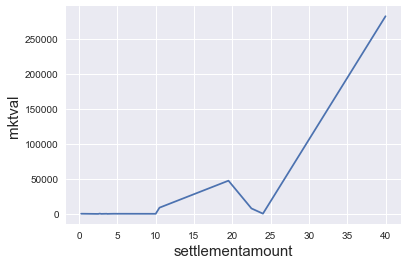

In [3]:
sns.lineplot(data=df, x='settlementamount', y='mktval')

In [4]:
df[df['tic']!='CR'].sort_values('mktval', ascending=False)

,tic,settlementamount,mktval
14,GE,40.00,"282,006.49"
11,LMT,19.50,"47,422.54"
10,CBI,10.50,"8,935.72"
12,PLL,22.50,"7,820.68"
2,APSG,2.70,464.00
13,FRPT,24.00,388.84
0,ABAT,0.28,294.24
4,XRM,3.60,253.68
7,BKR,4.50,240.80
8,HRLY,10.00,213.22


In [5]:
df[df['tic']!='CR'].describe()

,settlementamount,mktval
count,15.00,15.00
mean,10.71,"23,227.74"
std,11.14,"72,617.06"
min,0.28,10.60
25%,3.25,132.54
50%,4.50,253.68
75%,15.00,"4,142.34"
max,40.00,"282,006.49"


Text(0.5, 1.0, 'settlementamount Distribution')

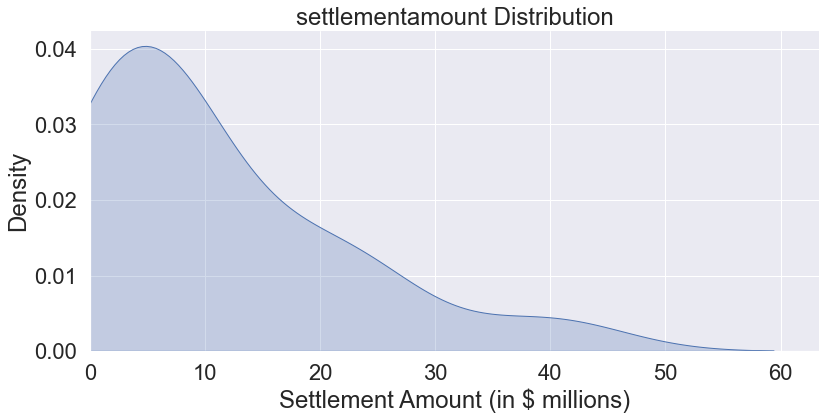

In [6]:
sns.set(font_scale = 2)
ax = sns.displot(df, x='settlementamount', kind='kde', height=6, aspect=2, fill=True, palette='dark')
plt.xlim(0)
plt.xlabel('Settlement Amount (in $ millions)')
plt.title('settlementamount Distribution')

Text(0.5, 1.0, 'mktval Distribution')

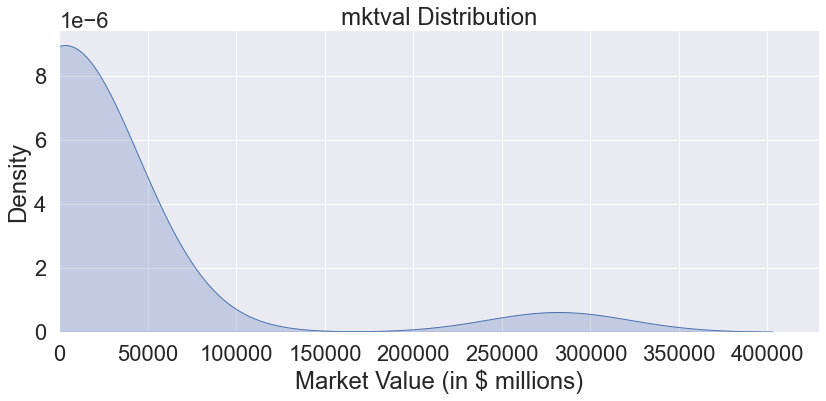

In [7]:
sns.set(font_scale = 2)
ax = sns.displot(df, x='mktval', kind='kde', height=6, aspect=2, fill=True, palette='dark')
plt.xlim(0)
plt.xlabel('Market Value (in $ millions)')
plt.title('mktval Distribution')

In [8]:
df_nocr = df[df['tic']!='CR'].sort_values('mktval', ascending=False)
df_nocr

,tic,settlementamount,mktval
14,GE,40.00,"282,006.49"
11,LMT,19.50,"47,422.54"
10,CBI,10.50,"8,935.72"
12,PLL,22.50,"7,820.68"
2,APSG,2.70,464.00
13,FRPT,24.00,388.84
0,ABAT,0.28,294.24
4,XRM,3.60,253.68
7,BKR,4.50,240.80
8,HRLY,10.00,213.22


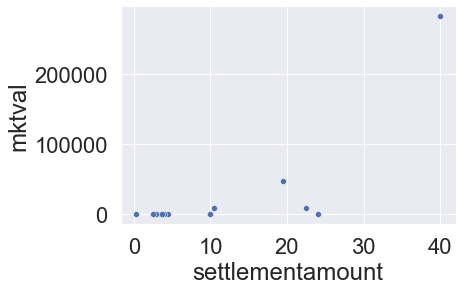

In [9]:
sns.scatterplot(data=df_nocr, x='settlementamount', y='mktval', sizes=(250,100))
# plt.ylim(0,10000)
# plt.xlim(0, 25000000)

In [10]:
df_nocr = df_nocr[~df_nocr['tic'].isin(['GE', 'LMT'])].sort_values('mktval', ascending=False)
df_nocr

,tic,settlementamount,mktval
10,CBI,10.50,"8,935.72"
12,PLL,22.50,"7,820.68"
2,APSG,2.70,464.00
13,FRPT,24.00,388.84
0,ABAT,0.28,294.24
4,XRM,3.60,253.68
7,BKR,4.50,240.80
8,HRLY,10.00,213.22
6,BWEN,3.92,138.09
9,AMSC,10.00,126.99


In [11]:
df_nocr.describe()

,settlementamount,mktval
count,13.00,13.00
mean,7.78,"1,460.54"
std,7.59,"3,081.41"
min,0.28,10.60
25%,2.90,126.99
50%,3.92,240.80
75%,10.00,388.84
max,24.00,"8,935.72"


Text(0.5, 1.0, 'settlementamount Distribution')

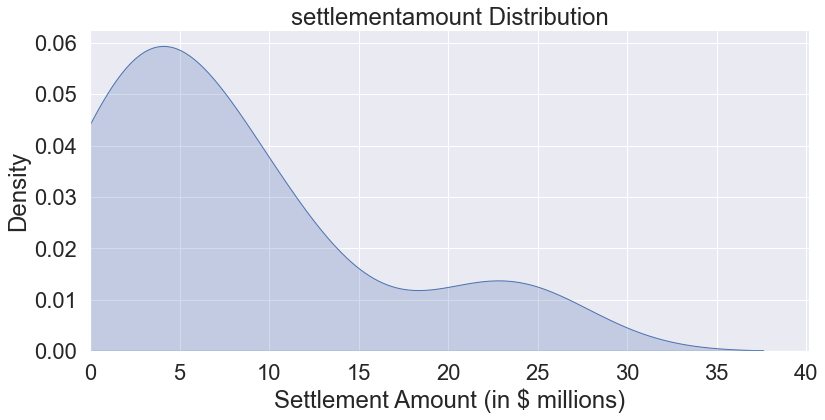

In [12]:
sns.set(font_scale = 2)
ax = sns.displot(df_nocr, x='settlementamount', kind='kde', height=6, aspect=2, fill=True, palette='dark')
plt.xlim(0)
plt.xlabel('Settlement Amount (in $ millions)')
plt.title('settlementamount Distribution')

Text(0.5, 1.0, 'mktval Distribution')

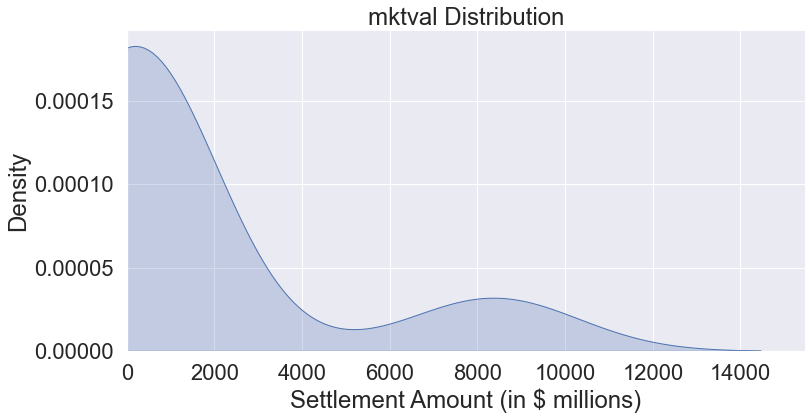

In [14]:
sns.set(font_scale = 2)
ax = sns.displot(df_nocr, x='mktval', kind='kde', height=6, aspect=2, fill=True, palette='dark')
plt.xlim(0)
plt.xlabel('Settlement Amount (in $ millions)')
plt.title('mktval Distribution')

In [15]:
df_nocr.describe()

,settlementamount,mktval
count,13.00,13.00
mean,7.78,"1,460.54"
std,7.59,"3,081.41"
min,0.28,10.60
25%,2.90,126.99
50%,3.92,240.80
75%,10.00,388.84
max,24.00,"8,935.72"


In [16]:
mean_mktval = df_nocr['mktval'].mean()
print('Mean value: ', mean_mktval)

Mean value:  1460.540053846154


In [17]:
mean_amt = df_nocr['settlementamount'].mean()
amt_stderr = df_nocr['settlementamount'].sem()
print('Mean Settlement Amount: ', mean_amt)
print('Standard Error of the Settlement Amount: ', amt_stderr)

Mean Settlement Amount:  7.776153846153847
Standard Error of the Settlement Amount:  2.104119064237847


In [18]:
CI = 1.96
print('Confidence Internal Used: ', CI)

Confidence Internal Used:  1.96


In [19]:
lower = mean_amt - CI*amt_stderr
upper = mean_amt + CI*amt_stderr
print('Lower Bounds: ', lower)
print('Upper Bounds: ', upper)

Lower Bounds:  3.652080480247667
Upper Bounds:  11.900227212060027


In [20]:
print('Below is the Market Value of Crane Co.: ')
df[df['tic']=='CR']

Below is the Market Value of Crane Co.: 


,tic,settlementamount,mktval
15,CR,nan,"3,912.94"


In [21]:
target_var = 3912.94
perc_target = target_var / mean_mktval
print('Target Variable: ', target_var)
print('Target Variable as Percent of Mean Market Value: ', perc_target)

Target Variable:  3912.94
Target Variable as Percent of Mean Market Value:  2.679104889794532


In [22]:
lower_exp_risk = lower * perc_target
upper_exp_risk = upper * perc_target
print('Exposure Risk (in $ millions) is between ${:6,.3f}'.format(lower_exp_risk)+' and ${:6,.3f}'.format(upper_exp_risk))

Exposure Risk (in $ millions) is between $ 9.784 and $31.882


# END